In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/summer2024/group project
# !ls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(42)

In [71]:
# data = pd.read_csv('rawdata/sandiego.csv')
data = pd.concat([pd.read_csv('rawdata/sandiego.csv'), pd.read_csv('rawdata/losangeles.csv')])
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.703000e+04,5.703000e+04,5.703000e+04,57028.000000,57028.000000,57030.000000,57030.000000,57030.000000,48192.000000,54126.000000,...,42892.000000,42883.000000,42890.000000,42882.000000,42881.000000,57030.000000,57030.000000,57030.000000,57030.000000,42959.000000
mean,4.776545e+17,2.024061e+13,1.847015e+08,93.698517,126.614295,33.776821,-118.068193,4.267526,1.655192,1.823911,...,4.768144,4.871353,4.870605,4.814790,4.715598,18.845099,16.907014,1.620235,0.101298,1.557830
std,4.729897e+17,7.060222e+06,1.831224e+08,557.256701,678.041882,0.544544,0.489738,3.011511,1.178202,1.350588,...,0.390902,0.317023,0.331312,0.332163,0.409551,70.695300,70.482673,6.237547,1.000918,1.804528
min,6.000000e+00,2.024061e+13,2.900000e+01,0.000000,0.000000,32.540760,-118.917134,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.272269e+07,2.024061e+13,2.555165e+07,1.000000,2.000000,33.787109,-118.386990,2.000000,1.000000,1.000000,...,4.710000,4.870000,4.880000,4.770000,4.650000,1.000000,1.000000,0.000000,0.000000,0.250000
50%,5.936457e+17,2.024061e+13,1.074344e+08,3.000000,5.000000,34.036950,-118.288685,4.000000,1.000000,1.000000,...,4.890000,4.970000,4.970000,4.910000,4.810000,2.000000,1.000000,0.000000,0.000000,0.940000
75%,9.444046e+17,2.024061e+13,3.451045e+08,13.000000,21.000000,34.095262,-117.941009,6.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,10.000000,7.000000,1.000000,0.000000,2.400000
max,1.185207e+18,2.024062e+13,5.844793e+08,4723.000000,8970.000000,34.811183,-116.936852,16.000000,50.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,644.000000,644.000000,78.000000,23.000000,56.460000


In [72]:
data = data[['name', 'description', 'neighborhood_overview','host_about', 'room_type', 'amenities', 'price', 'longitude', 'latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']]

In [5]:
data.head()

,name,description,neighborhood_overview,host_about,room_type,amenities,price
0,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",I am a San Diego based Entrepreneur with a lov...,Entire home/apt,"[""Hair dryer"", ""Children\u2019s bikes"", ""GE ga...",$199.00
1,Cozy Getaway Pacific Beach Oasis!,Your San Diego Oasis awaits!<br /><br />Privat...,NaN,I like to meet new people. I enjoy cooking and...,Private room,"[""Hair dryer"", ""Microwave"", ""Wifi"", ""Carbon mo...",$96.00
2,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,We love living part of the year in San Diego. ...,Entire home/apt,"[""Free parking on premises"", ""Hair dryer"", ""Sh...",$227.00
3,"La Jolla Cottage, 3Blks 2 Ocean; 2bd1bth, Stei...",Tucked away from city streets are 3 patio gard...,"Tranquility, stately trees, meditative, zen-fu...","As a La Jolla native, I have seen many change...",Entire home/apt,"[""Ceiling fan"", ""Hair dryer"", ""Portable heater...",$191.00
4,Pacific Beach Cozy Private Hideaway Free Bikes,"Cozy Private Beach Retreat. 420 friendly, we h...","This is the best part of Pacific Beach, we are...","I have a wonderful home in Pacific Beach, Cali...",Entire home/apt,"[""Hair dryer"", ""Portable heater"", ""Self check-...",$115.00


In [73]:
# data.dropna(inplace=True)
data.isnull().sum()

name                         1
description               1650
neighborhood_overview    25042
host_about               24947
room_type                    0
amenities                    0
price                     8836
longitude                    0
latitude                     0
accommodates                 0
bathrooms                 8838
bedrooms                  2904
beds                      8997
minimum_nights               0
review_scores_rating     14071
number_of_reviews            0
dtype: int64

In [74]:
data = data.dropna(subset=['price', 'longitude', 'latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews'])
data = data.fillna('')
data.shape

(37116, 16)

In [76]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)
def MinMaxScaler(data):
    MIN = data.min()
    MAX = data.max()
    return MIN, MAX, (data - MIN) / (MAX - MIN)
# MIN, MAX, data['price'] = MinMaxScaler(data['price'])

In [77]:
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# cleaned_data columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
data = remove_outliers_iqr(data,['price','longitude', 'latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews'],th3=0.8, multiplier=1.5)

column: price, lower_bound: -417.5, upper_bound: 794.5
column: longitude, lower_bound: -120.74035926414197, upper_bound: -115.15610015976338
column: latitude, lower_bound: 30.5607735, upper_bound: 36.2337471
column: accommodates, lower_bound: -6.5, upper_bound: 13.5
column: bathrooms, lower_bound: -0.5, upper_bound: 3.5
column: bedrooms, lower_bound: -3.0, upper_bound: 5.0
column: beds, lower_bound: -4.5, upper_bound: 7.5
column: minimum_nights, lower_bound: -42.5, upper_bound: 73.5
column: review_scores_rating, lower_bound: 0.0, upper_bound: 8.0
column: number_of_reviews, lower_bound: -141.5, upper_bound: 238.5


In [79]:
minmax = {}
for c in ['price','longitude', 'latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']:
    minn, maxx, data[c] = MinMaxScaler(data[c])
    minmax[c] = (minn, maxx)

In [80]:
data[['price', 'longitude', 'latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']].describe()

,price,longitude,latitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,number_of_reviews
count,31863.000000,31863.000000,31863.000000,31863.000000,31863.000000,31863.000000,31863.000000,31863.000000,31863.000000,31863.000000
mean,0.248816,0.453433,0.527686,0.248232,0.403329,0.320359,0.275192,0.167556,0.949063,0.172802
std,0.181187,0.257548,0.254785,0.197152,0.181624,0.203693,0.211022,0.199193,0.093542,0.222769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.119441,0.271076,0.190013,0.083333,0.285714,0.200000,0.142857,0.014493,0.937500,0.016878
50%,0.195680,0.334024,0.656153,0.250000,0.285714,0.200000,0.285714,0.028986,0.975000,0.075949
75%,0.318933,0.827090,0.689913,0.416667,0.571429,0.400000,0.428571,0.420290,1.000000,0.244726
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# prompt: vocabs = [], for each columns, split the strings by all punctuation marks and ' ', append every word to vocabs. assign the cell values with splitted words

import re

# Initialize an empty list to store vocabulary words
vocabs = []
new_data = [] # Initialize an empty list to store the processed data

# List of columns to process
columns = ['name', 'description', 'neighborhood_overview', 'host_about', 'room_type', 'amenities']



# for col in columns:
#     new_col = []
#     for i in range(len(data[col])):
#       cell_value = data[col][i]
#       if pd.isna(cell_value):
#           new_col.append([])
#       elif isinstance(cell_value, str):
#         words = re.split(r'[,\s.;!?\'\"\[\]\(\)\{\}*/-]+', cell_value)
#         words = [word.lower() for word in words if word]
#         for word in words:
#             if word not in vocabs:
#                 vocabs.append(word)
#         new_col.append(words)
#     new_data.append(new_col)

stop_words = {'the', 'is', 'in', 'it', 'and', 'to', 'of', 'a', 'that', 'with', 'as', 'for', 'on', 'this', 'by', 'an', 'at', 'or', 'from'}

def parse_words(cell_value, stop_words, htmls=['<br>', '</br>', '<p>', '</p>']):
    """
    Parse words from a given cell value, remove stop words and empty strings,
    and convert words to lowercase.

    Parameters:
    - cell_value (str): The text to be parsed.
    - stop_words (set): A set of stop words to be removed from the text.
    - htmls (list): A list of HTML tags to be replaced with spaces.

    Returns:
    - filtered_words (list): A list of parsed and filtered words.
    """
    # Replace HTML tags with spaces
    for html_tag in htmls:
        cell_value = cell_value.replace(html_tag, ' ')
    
    # Split the cell value into words using the specified delimiters
    # words = re.split(r"[\,\.\;\!\?\"\[\]\(\)\{\}\*\/\\\-\+\~]", cell_value)
    words = re.split(r"[,\s.;!?\"\[\]\(\)\{\}*/\\\-]+", cell_value)
    
    # Remove stop words and empty strings, and convert to lowercase
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word != '']

    return filtered_words

# Process data row by row
for idx, row in data.iterrows():
    new_row = []  # Initialize a new list to store processed words for the current row
    for col in columns:
        cell_value = row[col]  # Get the cell value for the current column and row
        if pd.isna(cell_value):
            new_row.append([])
        else:
            if isinstance(cell_value, str):
                words = parse_words(cell_value, stop_words)
                for word in words:
                  vocabs.append(word.lower())  # Add the word to the vocabulary list in lowercase
                  new_row.append(word.lower())  # Add the word to the current row list in lowercase
    new_data.append(new_row)  # Add the processed row to the new_data list


In [82]:
vocabs = set(vocabs)
print(f"Total unique words: {len(vocabs)}")

Total unique words: 53464


In [84]:
print(new_data[12365])

['studio', 'city', 'spanish', 'modern', 'showbiz', 'house', 'classic', '&', 'charming', 'two', 'bedroom', '1926', 'spanish', 'style', 'house', 'surrounded', '26', 'king', 'palms', 'within', '5', 'min', 'walk', 'restaurants', '&', 'coffee', 'shops', 'quiet', 'historic', 'showbiz', 'community', 'listed', 'one', 'top', '10', 'hidden', 'la', 'neighborhoods', 'los', 'angeles', 'magazine<br', '>nearby', 'aroma', 'coffee', 'shop', 'perfect', 'meals', 'breakfast', 'occasional', 'star', 'spotting', 'caoti', 'invented', 'bbq', 'chicken', 'pizza', "vitello's", 'has', 'great', 'food', 'amazing', 'jazz', 'most', 'nights', 'nearby', 'tujunga', 'village', 'ventura', 'boulevard', 'strip', 'riverside', 'drive', 'toluca', 'lake', 'have', 'every', 'type', 'food', 'shopping', 'you', 'could', 'desire', 'entire', 'home', 'apt', 'dishwasher', 'free', 'street', 'parking', 'refrigerator', 'dryer', 'cooking', 'basics', 'private', 'entrance', 'smoke', 'alarm', 'bbq', 'grill', 'carbon', 'monoxide', 'alarm', 'coff

In [85]:
word_to_idx = {word: idx for idx, word in enumerate(vocabs)}
idx_to_word = {idx: word for idx, word in enumerate(vocabs)}

In [86]:
def one_hot_encode_sentence(sentence, word_to_idx):
  encoded_sentence = np.zeros(len(word_to_idx))
  for word in sentence:
    encoded_sentence[word_to_idx[word]] += 1
  return encoded_sentence

def one_hot_encode(data, word_to_idx):
  vocab_size = len(word_to_idx)
  encoded_data = np.zeros((len(data), vocab_size))
  for row in range(len(data)):
    for word in data[row]:
      encoded_data[row][word_to_idx[word]] += 1
  return encoded_data

In [87]:
# max len of a row
max = 0
for row in new_data:
  if len(row) > max:
    max = len(row)
print(max)

1050


In [90]:
# Initialize an empty list to store the encoded data
# for row in new_data:
#   new_row = [0] * CONTEXT_SIZE
#   i = 0 # counter to keep track of the current position in new_row
#   for word in row:
#     new_row[i] = (word_to_idx[word]) # Map the word to its index and store it in new_row
#     i+=1
#     if i == CONTEXT_SIZE: # If we reach CONTEXT_SIZE, stop adding more words
#       break
#   encoded_data.append(new_row)

encoded_data = torch.tensor([one_hot_encode_sentence(row, word_to_idx) for row in new_data],dtype=torch.float32)

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 6814093728 bytes.

In [23]:
encoded_data.shape

(37116, 58958)

In [24]:
# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [27]:


# Normalize y
y_np = data[['price', 'longitude', 'latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']].values # Convert to numpy array

y = torch.tensor(y_np, dtype=torch.float32)
encoded_data_tensor = torch.tensor(encoded_data, dtype=torch.float32)

# Move data to the device
# encoded_data = encoded_data.to(device)
# y = y.to(device)

# Create TensorDataset
dataset = torch.utils.data.TensorDataset(encoded_data_tensor, y)

# Shuffle dataset and split into training and testing sets
def train_test_split_tensor(dataset, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    indices = np.arange(len(dataset))
    np.random.shuffle(indices)
    
    # Split indices
    split_idx = int(len(dataset) * (1 - test_size))
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    
    # Create datasets
    train_dataset = torch.utils.data.Subset(dataset, train_indices)
    test_dataset = torch.utils.data.Subset(dataset, test_indices)
    
    return train_dataset, test_dataset

# Split dataset
train_dataset, test_dataset = train_test_split_tensor(dataset, test_size=0.2, random_state=42)

# Create DataLoaders for training and testing datasets
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=512, shuffle=False)

In [28]:
VOCAB_SIZE = len(vocabs) # size of the vocabulary
CONTEXT_SIZE = 1500 # the maximum number of words to consider in each context (row)
EMBEDDING_DIM = 400 # dimensionality of the embedding vectors

In [33]:
class simpleNN(nn.Module):
  def __init__(self):
    super(simpleNN, self).__init__()
    self.fc1 = nn.Linear(VOCAB_SIZE, EMBEDDING_DIM)
    self.fc2 = nn.Linear(EMBEDDING_DIM, 10)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.relu(self.fc2(x))
    # x = self.fc2(x)
    return x

In [34]:
losses = []
loss_function = nn.MSELoss()
model = simpleNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
def train_model(model, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0

        for inputs, targets in train_loader:
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = loss_function(outputs.squeeze(), targets)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item() * len(inputs)

        # Average training loss for the epoch
        epoch_train_loss /= len(train_loader)
        train_losses.append(epoch_train_loss)

        # Validation
        model.eval()  # Set the model to evaluation mode
        epoch_val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                # Forward pass
                outputs = model(inputs)
                loss = loss_function(outputs.squeeze(), targets)

                epoch_val_loss += loss.item() * len(inputs)

        # Average validation loss for the epoch
        epoch_val_loss /= len(val_loader)
        val_losses.append(epoch_val_loss)

        # Print epoch summary
        print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    return train_losses, val_losses


In [35]:
num_epochs = 10  # Set the number of epochs
train_losses, val_losses = train_model(model, train_dataloader, test_dataloader, num_epochs=num_epochs)

Epoch 1/10 - Train Loss: 9.7180, Val Loss: 3.9666
Epoch 2/10 - Train Loss: 2.9208, Val Loss: 3.2915
Epoch 3/10 - Train Loss: 1.9988, Val Loss: 3.0980
Epoch 4/10 - Train Loss: 1.5424, Val Loss: 3.0282
Epoch 5/10 - Train Loss: 1.2632, Val Loss: 2.9721
Epoch 6/10 - Train Loss: 1.0913, Val Loss: 3.0034
Epoch 7/10 - Train Loss: 0.9687, Val Loss: 2.9751
Epoch 8/10 - Train Loss: 0.8582, Val Loss: 2.9985
Epoch 9/10 - Train Loss: 0.7791, Val Loss: 3.0184
Epoch 10/10 - Train Loss: 0.7037, Val Loss: 3.0072


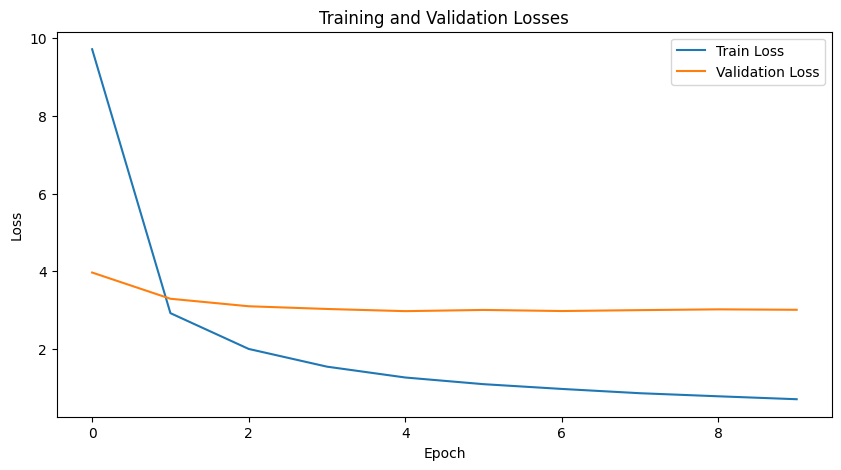

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [37]:
def get_vector(word, word_to_idx, model):
    """
    Retrieve the embedding vector for a given word from the weights of fc1 in the model.
    
    Parameters:
    - word (str): The word whose embedding vector is to be retrieved.
    - word_to_idx (dict): Dictionary mapping words to their indices.
    - model (torch.nn.Module): The neural network model containing the fc1 layer.
    
    Returns:
    - torch.Tensor: The embedding vector for the given word.
    """
    # Ensure the word is in the vocabulary
    if word not in word_to_idx:
        raise ValueError(f"Word '{word}' not found in vocabulary.")
    
    # Convert the word to its index
    word_idx = word_to_idx[word]
    
    # Retrieve the embedding vector from the fc1 weights
    # model.fc1.weight is of shape (VOCAB_SIZE, EMBEDDING_DIM)
    # We need the row corresponding to the word index
    embedding_vector = model.fc1.weight.T[word_idx]
    
    return embedding_vector
 

In [38]:
def find_closest_words(word, word_to_idx, idx_to_word, model, num_w):
    """
    Find and print the closest words to a given word based on their embedding vectors.
    
    Args:
    - word (str): The word to find closest words for.
    - word_to_idx (dict): Mapping from words to indices.
    - idx_to_word (dict): Mapping from indices to words.
    - model (torch.nn.Module): The model containing the embedding weights.
    - num_w (int): Number of closest words to find.
    """
    word_vector = get_vector(word, word_to_idx, model)
    
    # Get all word vectors
    all_vectors = model.fc1.weight.T
    
    # Compute cosine similarities between the word vector and all other vectors
    similarities = F.cosine_similarity(word_vector.unsqueeze(0), all_vectors)
    
    # Get the indices of the top `num_w` most similar vectors
    _, top_indices = similarities.topk(num_w + 1)  # +1 to exclude the word itself
    
    print(f"Closest words to '{word}':")
    for idx in top_indices[1:]:  # Skip the first index, which is the word itself
        word_idx = idx.item()
        print(f"Index: {word_idx}, Word: {idx_to_word[word_idx]}")

In [44]:
find_closest_words('surf', word_to_idx, idx_to_word, model, 100)

Closest words to 'surf':
Index: 34269, Word: 15
Index: 18503, Word: neighborhood
Index: 6942, Word: rentals
Index: 46734, Word: fenced
Index: 53028, Word: beach
Index: 10839, Word: beaches
Index: 519, Word: hulu
Index: 56536, Word: over
Index: 24189, Word: many
Index: 43939, Word: golf
Index: 25070, Word: u2019n
Index: 28215, Word: locals
Index: 50280, Word: reading
Index: 49926, Word: vacation
Index: 39483, Word: term
Index: 24512, Word: yet
Index: 1190, Word: crib
Index: 17770, Word: local
Index: 58107, Word: boutiques
Index: 35577, Word: darkening
Index: 29493, Word: play
Index: 24205, Word: something
Index: 13913, Word: around
Index: 53621, Word: u2013
Index: 41084, Word: pack
Index: 10964, Word: convention
Index: 7773, Word: some
Index: 13559, Word: ft
Index: 15461, Word: 50
Index: 9471, Word: activities
Index: 55512, Word: vibrant
Index: 51267, Word: ><br
Index: 26752, Word: sea
Index: 18983, Word: chair
Index: 53778, Word: be
Index: 27254, Word: stainless
Index: 44448, Word: res

In [45]:
def restore_price(p):
    return p * (MAX - MIN) + MIN

In [ ]:
vocabs_list = list(vocabs)
print(vocabs_list)

['“great', 'discovery', 'only', 'colder', '>upstairs', 'snorkeling', 'item', 'bleached<br', 'travellilng', 'corepower', '59', 'cup', 'sulfate', 'least', 'round', 'unicorn', 'salvadorian', '220v', 'j&j', 'racoon', '127', 'por', 'beaching', 'student', '>down', 'heal', 'tub+deck', 'session', '805&', 'stefanie', 'mexico', '>☀️', 'arrangements:<br', 'crumbling', 'ride', 'tool', 'worshiper', 'practice', 'whenever', 'shrubs', 'balcony', 'months<br', '4<br', 'calmness', 'lovin', 'pizzeria', 'otl', 'licenciada', 'enter', 'conventionc', 'father', 'concept', 'dulcinea', 'oriental', 'layed', '1800sqft', 'keno', 'arlon', 'marrakesh', '709', 'amo', 'plaza:<br', 'banh', 'outgrowing', 'out…', 'winding', 'gentler', '04455l<br', '>from', 'terrain', 'hobby', 'mess', 'fogo', 'url', 'dart', '>contact', 'futons', 'washers', 'stocking', '>theater<br', 'modest', 'curving', 'started', 'oracle', 'dipper', '#san10', 'platforms', 'cushioned', 'long', 'kiehl', 'philosophy', 'excessive', 'concentrate', 'sibling', '

In [47]:
try:
    random_n = np.random.randint(0, len(new_data))
    print(random_n)
    print(data.iloc[random_n])
    print(new_data[random_n])
    s1 = restore_price(data['price'][random_n])
    s2 = model(torch.tensor(one_hot_encode_sentence(new_data[random_n], word_to_idx), dtype=torch.float32))
    print(f"og price: {s1}, predict price: {restore_price(s2[0])}")
except: print('something wrong with accessing data[price]')

10899
name                     LUXURIOUS HOME w/ DOUBLE LOT in the VENICE CAN...
description              No homes to the left & right of you, a corner ...
neighborhood_overview    Venice has the 3 MAIN attractions that just ab...
host_about               My name is Daniel, my wife Julia, and my mothe...
room_type                                                  Entire home/apt
amenities                ["Free street parking", "Dryer", "TV with stan...
price                                                              0.00489
longitude                                                         0.227162
latitude                                                          0.641289
accommodates                                                           0.6
bathrooms                                                         0.214286
bedrooms                                                          0.173913
beds                                                              0.176471
minimum_nights     

In [48]:
a = model(torch.tensor(one_hot_encode_sentence(parse_words('beautiful 4 beds 3 baths swimming pool ultimate chill lots of cats and delicious food', stop_words), word_to_idx), dtype=torch.float32))
print(restore_price(a[0].item()))
b = model(torch.tensor(one_hot_encode_sentence(parse_words('ugly hot hell 1 bed 1 bath full of tears and regrets', stop_words), word_to_idx), dtype=torch.float32))
print(restore_price(b[0].item()))

6.0
6.0


tensor(0.0065)
torch.Size([512, 10]) torch.Size([512])


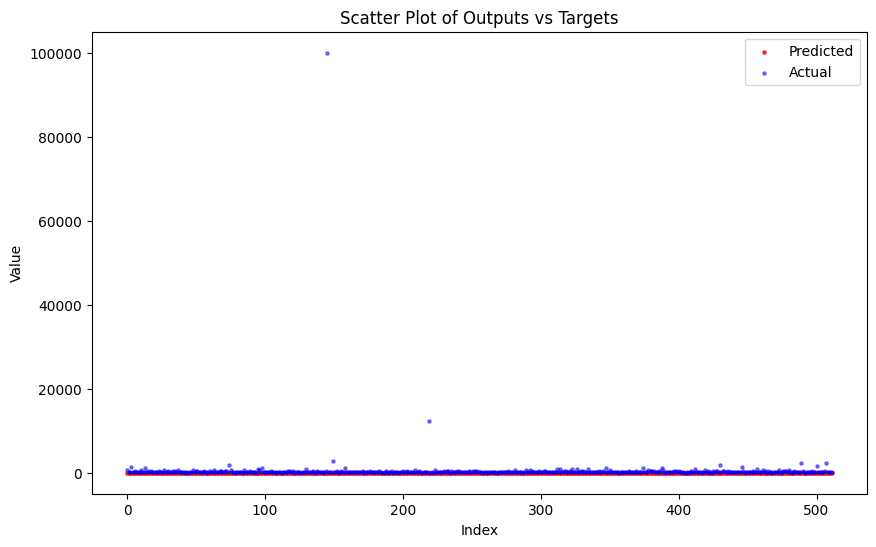

In [57]:
model.eval()  # Set the model to evaluation mode
start = 30
end = 31
all_outputs = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        # Forward pass
        outputs = model(inputs)
        # print(i, outputs, targets)
        loss = loss_function(outputs.squeeze(), targets)
        print(loss)
        print(targets.shape, outputs[:,0].shape)
        # Store the outputs, targets, and indices for plotting
        all_outputs.extend(outputs[:,0].cpu().numpy())
        all_targets.extend(targets[:,0].cpu().numpy())
        
        start += 1
        if start == end:
            break

# Convert lists to numpy arrays for plotting
all_outputs = restore_price(np.array(all_outputs))
all_targets = restore_price(np.array(all_targets))
size = np.arange(all_outputs.shape[0])

# Scatter plot of outputs vs targets
plt.figure(figsize=(10, 6))
point_size = 5
plt.scatter(size, all_outputs, color='r', label='Predicted',alpha=0.8, s=point_size)
plt.scatter(size, all_targets, color='b', label='Actual', alpha=0.5,s=point_size)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Outputs vs Targets')
plt.legend()
plt.show()



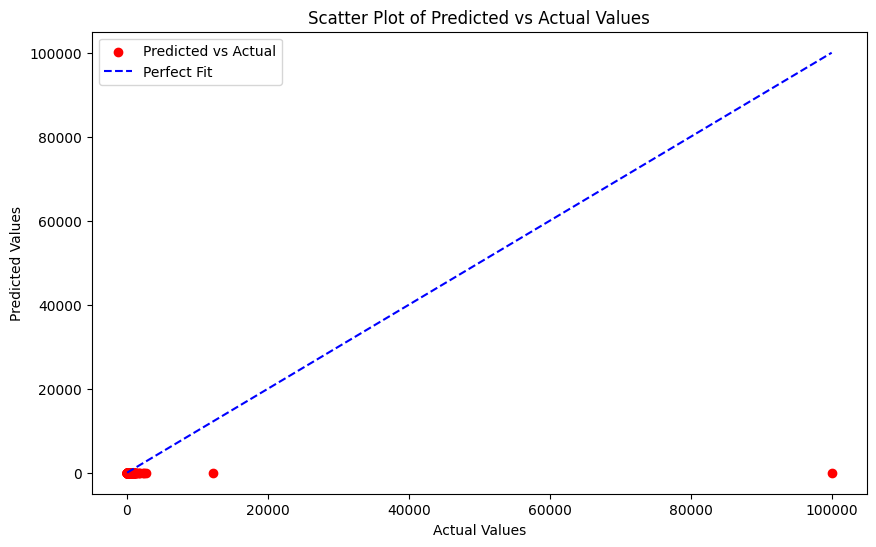

In [58]:
# Scatter plot of all_outputs vs all_targets
plt.figure(figsize=(10, 6))
plt.scatter(all_targets, all_outputs, color='r', label='Predicted vs Actual')
min_val = np.min(all_targets)
max_val = np.max(all_targets)
plt.plot([min_val, max_val], [min_val, max_val], 'b--', label='Perfect Fit')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), 'we_model2')

In [61]:
start = 30
end = 31
# all_outputs = []
# all_targets = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        # Forward pass
        outputs = model(inputs)
        # print(i, outputs, targets)
        # loss = loss_function(outputs.squeeze(), targets)
        # print(loss)
        for i in zip(targets, outputs):
            print(i[0])
            print(i[1])
            print()

        
        start += 1
        if start == end:
            break

tensor([6.6205e-03, 3.0159e-01, 6.9877e-01, 2.6667e-01, 2.1429e-01, 1.3043e-01,
        8.8235e-02, 2.9029e-02, 1.0000e+00, 6.8918e-04])
tensor([0.0000, 0.3182, 0.5477, 0.3007, 0.1756, 0.1250, 0.0803, 0.0000, 0.8516,
        0.0000])

tensor([8.4006e-04, 2.8780e-01, 6.7777e-01, 6.6667e-02, 7.1429e-02, 4.3478e-02,
        2.9412e-02, 2.9029e-02, 9.2750e-01, 2.0675e-03])
tensor([0.0000, 0.2609, 0.6201, 0.1446, 0.0373, 0.0574, 0.0736, 0.0000, 0.7971,
        0.0000])

tensor([0.0010, 0.2730, 0.6964, 0.0667, 0.0714, 0.0435, 0.0294, 0.0000, 0.9675,
        0.1113])
tensor([0.0000, 0.4197, 0.7626, 0.0000, 0.0539, 0.0177, 0.0000, 0.0000, 1.0515,
        0.0983])

tensor([0.0132, 0.8417, 0.1112, 0.7333, 0.2500, 0.1304, 0.2353, 0.0000, 1.0000,
        0.0038])
tensor([0.0000, 0.8689, 0.0683, 0.4508, 0.2007, 0.1525, 0.1026, 0.0000, 0.9199,
        0.0000])

tensor([0.0014, 0.3239, 0.6111, 0.2667, 0.0714, 0.0870, 0.0000, 0.0000, 1.0000,
        0.0017])
tensor([0.0000, 0.2661, 0.6176, 0.2195, 0.1